In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
file = "C:\\C NEW\\databases\\StudentsPerformance.csv"
df = pd.read_csv(file)

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.shape

(1000, 8)

In [21]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
df.duplicated().sum()


0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
[feature for feature in df.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [34]:
num = [feature for feature in df.columns if df[feature].dtype != "O"]

In [35]:
cat= [feature for feature in df.columns if df[feature].dtype == "O"]

In [37]:
num 

['math score', 'reading score', 'writing score']

In [38]:
cat

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [41]:
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score'])
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

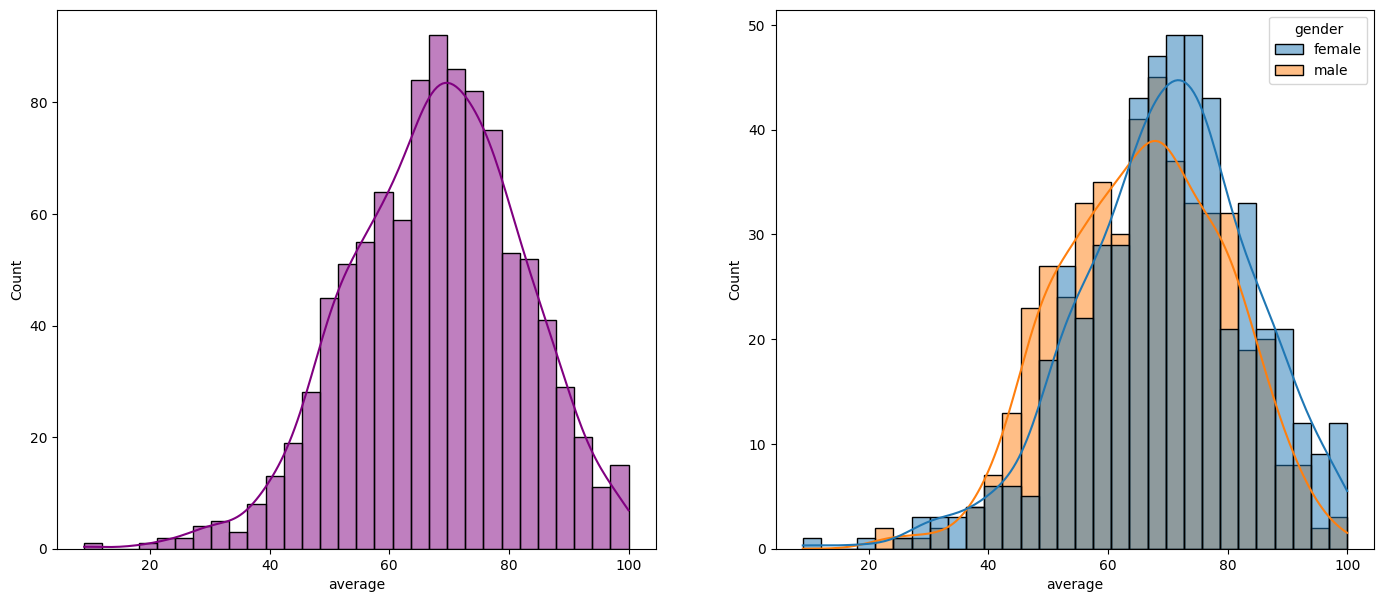

In [49]:
fig,axis = plt.subplots(1,2, figsize = (17,7))
plt.subplot(121)
sns.histplot(data = df , x= 'average', bins = 30 , kde = True, color = 'purple' )
plt.subplot(122)
sns.histplot(data = df , x= 'average', hue = 'gender' , bins = 30 , kde = True, color = 'purple' )

## Female perform better than male students

<Axes: xlabel='average', ylabel='Count'>

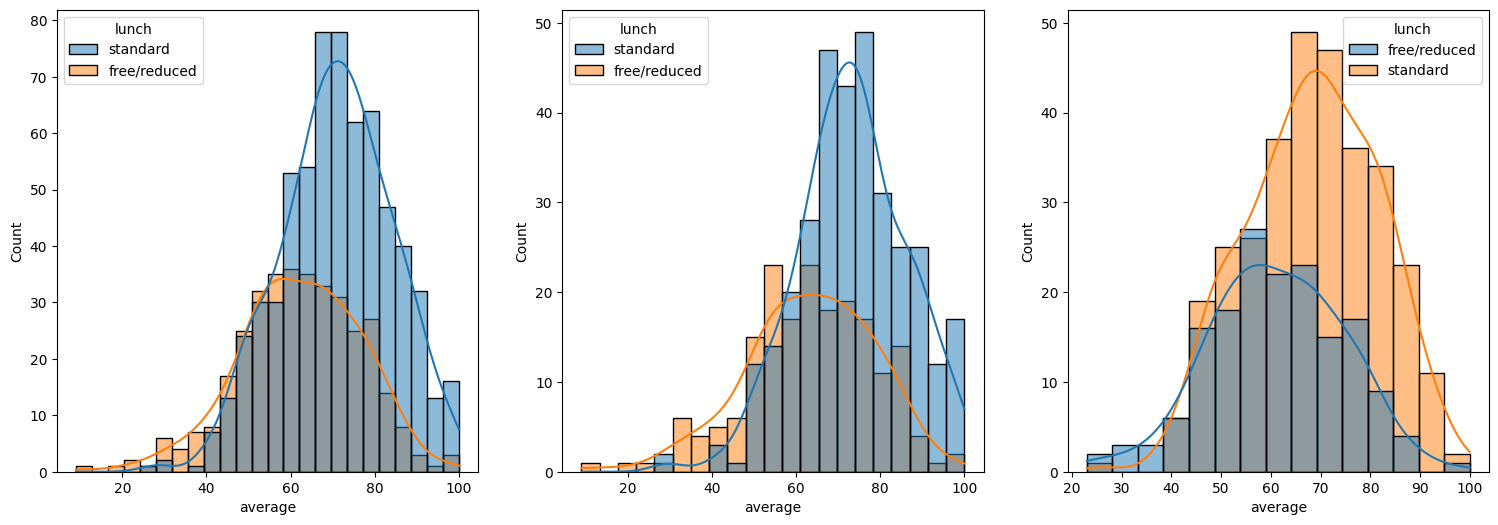

In [52]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df , x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True , hue = 'lunch' )
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True , hue = 'lunch' )

## Standard Lunch helps students perform well in exams irrespetive of the gender

<Axes: xlabel='average', ylabel='Count'>

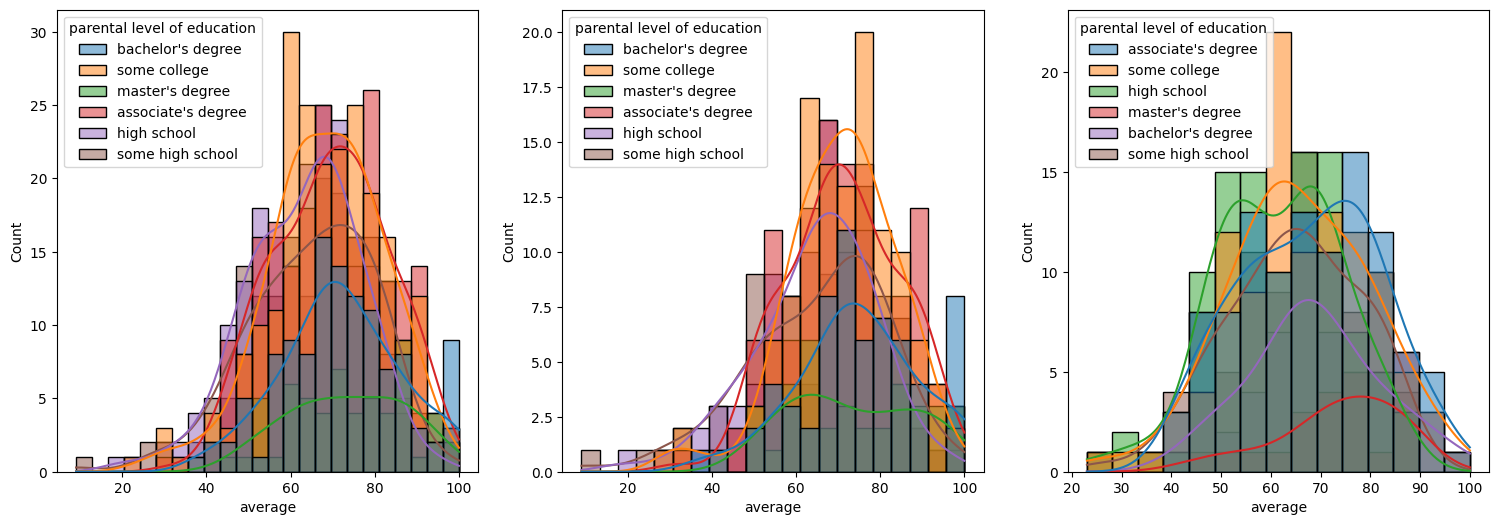

In [54]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df , x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True , hue = 'parental level of education' )
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True , hue = 'parental level of education' )

## In general the parents education level doesn't affects a child's performancs

## In case of male students, the performance is linked to parents education level in some cases